---
# 투자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from datetime import timedelta

In [2]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

In [ ]:
동등비중/2012/전략1/4.64/4.66/0.34/0.45
동등비중/2012/전략2/15.23/15.28/2.19/3.73
동등비중/2012/전략3/4.58/4.59/0.53/0.79 # 전략 3 다 다시
동등비중/2012/전략4/6.41/6.43/0.82/1.17
동등비중/2012/전략4/22.22/22.28/2.26/3.46

---
# 비중계산

## 1. 마코위츠 데이터 로드

In [4]:
df=pd.read_excel('./datasets/투자종목_2012.xlsx', index_col=0)
df["거래소코드"] = df["거래소코드"].map(padding)
df

,거래소코드
0,011080
1,052770
2,020120
3,066700
4,035460
5,039740
6,096040
7,052300
8,007720
9,134060


In [5]:
df=pd.DataFrame(df['거래소코드'].unique())
df.rename(columns={0:'거래소코드'}, inplace=True)
df

,거래소코드
0,011080
1,052770
2,020120
3,066700
4,035460
5,039740
6,096040
7,052300
8,007720
9,134060


## a. volinger

> # 날짜 변경(2012년도데이터면 20120401~20130331)
> 비중계산은 4월부터 3월(아래서 투자할 때는 +1년의 1월부터 +2년의 3월)

In [6]:
n=20
sigma = 2
df_marko=[]

for i in df.index:
    df_market = stock.get_market_ohlcv("20120401", "20130331", df.loc[i,"거래소코드"])
    df_market["거래소코드"] = df.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_marko.append(df_market)

In [7]:
df_marko = pd.concat(df_marko)
df_marko['PB'] = (df_marko['종가'] - df_marko['lb']) / (df_marko['ub'] - df_marko['lb'])
df_marko.reset_index(drop=False, inplace=True)
df_marko=df_marko.pivot(index='날짜', columns='거래소코드', values='종가')
df_marko

거래소코드,001780,004870,007720,011080,020120,035460,039740,052300,052770,066700,096040,134060
날짜,,,,,,,,,,,,
2012-04-02,2590,3100,4545,1300,1600,1980,3200,574,2675,7650,2120,3955
2012-04-03,2600,3100,4430,1370,1840,1980,3370,571,2640,7750,2210,3980
2012-04-04,2545,3100,4340,1340,1850,1950,3330,597,2490,7550,2250,3925
2012-04-05,2510,3100,4835,1330,1990,1980,3320,610,2525,7460,2395,3775
2012-04-06,2495,3100,4515,1360,1900,1925,3340,608,2555,7450,2220,3785
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-25,2350,1790,3330,1510,2430,2500,4600,1030,4005,11500,3465,3315
2013-03-26,2305,1745,3340,1650,2510,2380,4630,1030,4110,11450,3475,3300
2013-03-27,2310,1815,3345,1645,2435,2450,4655,1020,4040,11100,3630,3315


## 2. pct change(종목별 일별수익률)

In [8]:
daily_ret = df_marko.pct_change()
daily_ret

거래소코드,001780,004870,007720,011080,020120,035460,039740,052300,052770,066700,096040,134060
날짜,,,,,,,,,,,,
2012-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-03,0.003861,0.000000,-0.025303,0.053846,0.150000,0.000000,0.053125,-0.005226,-0.013084,0.013072,0.042453,0.006321
2012-04-04,-0.021154,0.000000,-0.020316,-0.021898,0.005435,-0.015152,-0.011869,0.045534,-0.056818,-0.025806,0.018100,-0.013819
2012-04-05,-0.013752,0.000000,0.114055,-0.007463,0.075676,0.015385,-0.003003,0.021776,0.014056,-0.011921,0.064444,-0.038217
2012-04-06,-0.005976,0.000000,-0.066184,0.022556,-0.045226,-0.027778,0.006024,-0.003279,0.011881,-0.001340,-0.073069,0.002649
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-25,0.058559,-0.005556,-0.007452,0.041379,0.104545,0.033058,0.009879,-0.019048,-0.001247,0.000000,0.022124,0.000000
2013-03-26,-0.019149,-0.025140,0.003003,0.092715,0.032922,-0.048000,0.006522,0.000000,0.026217,-0.004348,0.002886,-0.004525
2013-03-27,0.002169,0.040115,0.001497,-0.003030,-0.029880,0.029412,0.005400,-0.009709,-0.017032,-0.030568,0.044604,0.004545


## 3. annuar_ret(일별수익률의 공분산)

In [9]:
annual_ret = daily_ret.mean()*252 # 연간 수익률(아래 비중 계산에 사용됨)
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252
annual_cov

거래소코드,001780,004870,007720,011080,020120,035460,039740,052300,052770,066700,096040,134060
거래소코드,,,,,,,,,,,,
001780,0.109861,0.008249,0.014808,0.026703,0.022433,0.026807,0.037839,0.029898,0.062348,0.042978,0.046840,0.025440
004870,0.008249,0.572648,0.000267,-0.050874,0.010004,0.002114,0.049272,0.011204,0.047887,-0.010635,0.014615,0.026038
007720,0.014808,0.000267,0.308766,0.001920,0.004690,0.029295,-0.026910,0.019851,0.014901,0.003695,0.013846,0.010029
011080,0.026703,-0.050874,0.001920,0.444735,0.007164,0.028122,0.067099,-0.048971,0.020334,0.029105,0.075959,0.024309
020120,0.022433,0.010004,0.004690,0.007164,0.230977,0.009281,0.015497,0.032522,0.022556,0.001565,0.030846,-0.004000
035460,0.026807,0.002114,0.029295,0.028122,0.009281,0.227970,0.035557,-0.009781,0.023146,0.013787,0.062763,0.001267
039740,0.037839,0.049272,-0.026910,0.067099,0.015497,0.035557,1.151796,0.019558,-0.015793,0.009336,0.113297,-0.012931
052300,0.029898,0.011204,0.019851,-0.048971,0.032522,-0.009781,0.019558,0.603059,-0.012716,-0.010997,-0.000010,-0.042128
052770,0.062348,0.047887,0.014901,0.020334,0.022556,0.023146,-0.015793,-0.012716,0.649496,0.026275,0.061786,0.087649


In [10]:
list_stocks=annual_cov.columns.tolist()
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = [] 

## 4. 몬테까를로 시뮬레이션 20000개 시나리오 

In [11]:
#몬테까를로 시뮬레이션 20000개 시나리오 
for _ in range(20000): 
    weights = np.random.random(len(list_stocks))  # 랜덤숫자 4개
    weights /= np.sum(weights)  # 4개의 랜덤 숫자를 랜덤 숫자의 총합으로 나눠서, 4 종목 비중의 합이 1

    returns = np.dot(weights, annual_ret) # 비중 * 연간 수익율 --> 포트 수익률
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # 종목별 연간 공분산과 종목별 비중 배열 곱하고, 이를 다시 종목 별 비중 전치로 곱함. 이걸 제곱근. 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) 

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(list_stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in list_stocks]]  

In [12]:
df

,Returns,Risk,Sharpe,001780,004870,007720,011080,020120,035460,039740,052300,052770,066700,096040,134060
0,0.303413,0.226384,1.340259,0.130441,0.104253,0.086088,0.072314,0.071751,0.046577,0.088344,0.085780,0.058006,0.081815,0.031105,0.143526
1,0.342040,0.295241,1.158511,0.173978,0.168329,0.085359,0.096679,0.007766,0.023768,0.166442,0.061117,0.086322,0.063415,0.059722,0.007102
2,0.485656,0.243680,1.993011,0.038583,0.028004,0.063926,0.053095,0.040646,0.081281,0.064704,0.149720,0.126158,0.147612,0.078281,0.127989
3,0.389897,0.282340,1.380948,0.024162,0.148322,0.023749,0.213077,0.015222,0.200451,0.107512,0.069483,0.111765,0.039903,0.011071,0.035284
4,0.426222,0.252953,1.684982,0.124169,0.103925,0.010432,0.102128,0.162247,0.046758,0.008385,0.091209,0.072776,0.025469,0.160819,0.091682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.489031,0.284216,1.720629,0.076727,0.121575,0.007937,0.167685,0.132858,0.013151,0.133189,0.060938,0.120355,0.097521,0.065759,0.002305
19996,0.435024,0.286835,1.516637,0.045757,0.062070,0.102852,0.001691,0.098251,0.202036,0.157604,0.014581,0.173828,0.128342,0.003139,0.009848
19997,0.256721,0.220622,1.163622,0.140444,0.041417,0.145803,0.034111,0.024907,0.162638,0.010601,0.118723,0.018788,0.069518,0.058098,0.174951
19998,0.486668,0.247813,1.963853,0.028507,0.090160,0.005356,0.128607,0.094079,0.056911,0.091480,0.130083,0.118378,0.153747,0.025123,0.077571


In [13]:
# 리스크가 같을 때 수익률을 높게 : 아래 별모양
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
max_sharpe

,Returns,Risk,Sharpe,001780,004870,007720,011080,020120,035460,039740,052300,052770,066700,096040,134060
19976,0.651818,0.279382,2.333073,0.011895,0.007726,0.009072,0.151623,0.197369,0.024924,0.066116,0.178323,0.036143,0.145285,0.151965,0.019558


In [14]:
list_code = list(max_sharpe.columns)
list_percen = list(max_sharpe.iloc[0])
dict_weight_max = dict(zip(list_code, list_percen))
print(dict_weight_max)

{'Returns': 0.6518176428260162, 'Risk': 0.27938154359814565, 'Sharpe': 2.3330733821256704, '001780': 0.011895490657821323, '004870': 0.007725745300204297, '007720': 0.009071909612484545, '011080': 0.1516228747457244, '020120': 0.19736897488388033, '035460': 0.02492415622972489, '039740': 0.06611621214548571, '052300': 0.17832319239492772, '052770': 0.03614259401030173, '066700': 0.1452854296925365, '096040': 0.15196542539643318, '134060': 0.019557994930475428}


In [15]:
# 수익률이 같을 때 리스크를 낮게 : 아래 x모양
min_risk = df.loc[df['Risk'] == df['Risk'].min()] 
min_risk

,Returns,Risk,Sharpe,001780,004870,007720,011080,020120,035460,039740,052300,052770,066700,096040,134060
53,0.295715,0.202399,1.461048,0.138452,0.053688,0.093375,0.121818,0.119908,0.117695,0.022208,0.067472,0.023811,0.133665,0.011574,0.096334


In [16]:
list_code = list(min_risk.columns)
list_percen = list(min_risk.iloc[0])
dict_weight_min = dict(zip(list_code, list_percen))
print(dict_weight_min)

{'Returns': 0.29571458950653284, 'Risk': 0.20239899785141632, 'Sharpe': 1.4610476961136967, '001780': 0.1384518309160607, '004870': 0.05368823285073179, '007720': 0.09337455363161419, '011080': 0.1218182898443178, '020120': 0.11990751045539585, '035460': 0.1176950042054732, '039740': 0.022208406205416323, '052300': 0.06747244058725049, '052770': 0.0238112990699605, '066700': 0.1336648844724142, '096040': 0.011573622153361798, '134060': 0.09633392560800319}


## 5. 몬테까를로 시각화

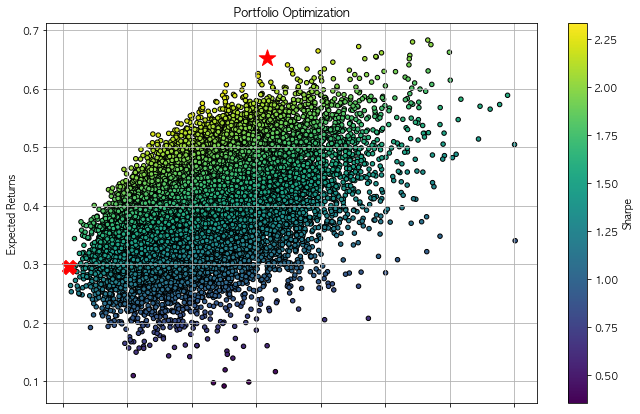

In [17]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)  
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300) 
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)  
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

---
# 전략

## 1. 볼린저밴드와 MFI를 활용한 추세 추종 매매

추세 추종 : 상승 추세에 매수, 하락 추세에 매도
현금흐름지표 MFI나 일중강도 같은 거래량 관련 지표를 함께 활용

매수 : 주가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수 (%b가 0.8보다 크고, MFI가 80보다 클 때)
매도 : 주가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도 (%b가 0.2보다 작고, MFI가 20보다 작을 때)

%b : 주가가 볼린저 밴드 어디에 위치하는지 
     (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드)

MFI : 중심가격 TP (고가, 저가, 종가 합을 3으로 나눔) 
     TP * 거래량 = 현금흐름  --> 이것을 중심가격이 전일 대비 상승한 날은 '긍정적 현금흐름 합'
                                                   하락한 날은 '부정적 현금흐름 합'



## 2. 볼린저 밴드와 일중 강도를 활용한 반전 매매

### a.볼린저밴드

- 주가가 반점하는 지점을 찾아서 매수 또는 매도
- 매수 : 주가가 하단 밴드 부근에서 W(쌍바닥) 패턴을 나타내고, 강세 지표가 확증 할 때 매수 (%b가 0.05보다 작고, II% 가 0보다 크면 매수)
- 매도 : 주가가 상단 밴드 부근에서 주가 태그, 약세 지표가 확증 할 때 매수 (%b가 0.95보다 크고, II% 가 0보다 작으면 매수)

---
# Preprocessing 

## 0. Data

In [18]:
df_2012=pd.read_excel('./datasets/투자종목_2012.xlsx', index_col=0)
df_2012["거래소코드"] = df_2012["거래소코드"].map(padding)
df_2012

,거래소코드
0,011080
1,052770
2,020120
3,066700
4,035460
5,039740
6,096040
7,052300
8,007720
9,134060


In [19]:
df_2012=pd.DataFrame(df_2012['거래소코드'].unique())
df_2012.rename(columns={0:'거래소코드'}, inplace=True)
df_2012

,거래소코드
0,011080
1,052770
2,020120
3,066700
4,035460
5,039740
6,096040
7,052300
8,007720
9,134060


## 1. volinger

> # 날짜 변경(2012년도데이터면 20130101~20140331)

In [20]:
n=20
sigma = 2
df_invest=[]

for i in df_2012.index:
    df_market = stock.get_market_ohlcv("20130101", "20140331", df_2012.loc[i,"거래소코드"]) # 연도마다 날짜 설정
    df_market["거래소코드"] = df_2012.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_invest.append(df_market)

In [21]:
df_invest = pd.concat(df_invest)
df_invest['PB'] = (df_invest['종가'] - df_invest['lb']) / (df_invest['ub'] - df_invest['lb'])
df_invest['PB'] = df_invest['PB'].fillna(0.5) # 상한선 하한선이 같아서 PB(바닥부터의 위치)를 중간인 0.5로 설정
df_invest

,시가,고가,저가,종가,거래량,거래대금,등락률,거래소코드,center,ub,lb,PB
날짜,,,,,,,,,,,,
2013-01-02,909,916,869,916,41105,46184285,2.20,011080,NaN,NaN,NaN,0.500000
2013-01-03,924,940,912,940,49536,57776870,2.59,011080,NaN,NaN,NaN,0.500000
2013-01-04,940,948,916,948,51402,60286530,0.84,011080,NaN,NaN,NaN,0.500000
2013-01-07,956,1031,936,1003,124374,157557835,5.83,011080,NaN,NaN,NaN,0.500000
2013-01-08,1019,1031,984,1019,35562,45543835,1.57,011080,NaN,NaN,NaN,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-25,2350,2390,2340,2340,265502,624095930,-0.85,001780,2124.75,2583.747477,1665.752523,0.734478
2014-03-26,2315,2365,2300,2355,296778,691025880,0.64,001780,2146.25,2606.134139,1686.365861,0.726959
2014-03-27,2360,2360,2315,2320,162788,378902650,-1.49,001780,2165.75,2620.065853,1711.434147,0.669761


## 2. MFI (Money Flow Index)

In [22]:
df_invest.rename(columns={'고가':'high'},inplace = True)
df_invest.rename(columns={'저가':'low'},inplace = True)
df_invest.rename(columns={'종가':'close'},inplace = True)
df_invest.rename(columns={'거래량':'volume'},inplace = True)

In [23]:
df_invest['TP'] = (df_invest['high'] + df_invest['low'] + df_invest['close']) / 3
df_invest["PMF"] = 0
df_invest["NMF"] = 0

In [24]:
for i in range(len(df_invest.close)-1):
    if df_invest.TP.values[i] < df_invest.TP.values[i+1]:
        df_invest.PMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.NMF.values[i+1] = 0
    else:
        df_invest.NMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.PMF.values[i+1] = 0

In [25]:
df_invest['MFR'] = (df_invest.PMF.rolling(window=10).sum() / df_invest.NMF.rolling(window=10).sum())
df_invest['MFR'] = df_invest['MFR'].fillna(0) # PMF, NMF가 0이면 NaN임(거래정지일 때)
df_invest['MFI10'] = 100 - 100/(1 + df_invest['MFR'])
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10
날짜,,,,,,,,,,,,,,,,,
2013-01-02,909,916,869,916,41105,46184285,2.20,011080,NaN,NaN,NaN,0.5,900.333333,0,0,0.000000,0.000000
2013-01-03,924,940,912,940,49536,57776870,2.59,011080,NaN,NaN,NaN,0.5,930.666667,46101504,0,0.000000,0.000000
2013-01-04,940,948,916,948,51402,60286530,0.84,011080,NaN,NaN,NaN,0.5,937.333333,48180808,0,0.000000,0.000000
2013-01-07,956,1031,936,1003,124374,157557835,5.83,011080,NaN,NaN,NaN,0.5,990.000000,123130260,0,0.000000,0.000000
2013-01-08,1019,1031,984,1019,35562,45543835,1.57,011080,NaN,NaN,NaN,0.5,1011.333333,35965036,0,0.000000,0.000000
2013-01-09,1035,1043,1007,1023,27801,36059290,0.39,011080,NaN,NaN,NaN,0.5,1024.333333,28477490,0,0.000000,0.000000
2013-01-10,1039,1039,980,980,24696,31174625,-4.25,011080,NaN,NaN,NaN,0.5,999.666667,0,24687768,0.000000,0.000000
2013-01-11,1011,1035,960,995,23708,30089560,1.61,011080,NaN,NaN,NaN,0.5,996.666667,0,23628973,0.000000,0.000000
2013-01-14,1011,1027,968,980,37503,47487455,-1.59,011080,NaN,NaN,NaN,0.5,991.666667,0,37190475,0.000000,0.000000


## 3. 일중 강도

In [26]:
df_invest['II'] = (2*df_invest['close']-df_invest['high']-df_invest['low'])/(df_invest['high']-df_invest['low'])*df_invest['volume']
df_invest['II'] = df_invest['II'].fillna(0) # 상한가 또는 하한가일 때 가격이 고정되어서 분모, 분자가 0이된다.
df_invest['IIP21'] = df_invest['II'].rolling(window=21).sum()/df_invest['volume'].rolling(window=21).sum()*100
# df_invest = df_invest.dropna()
df_invest.head(20)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21
날짜,,,,,,,,,,,,,,,,,,,
2013-01-02,909,916,869,916,41105,46184285,2.20,011080,NaN,NaN,NaN,0.500000,900.333333,0,0,0.000000,0.000000,41105.000000,NaN
2013-01-03,924,940,912,940,49536,57776870,2.59,011080,NaN,NaN,NaN,0.500000,930.666667,46101504,0,0.000000,0.000000,49536.000000,NaN
2013-01-04,940,948,916,948,51402,60286530,0.84,011080,NaN,NaN,NaN,0.500000,937.333333,48180808,0,0.000000,0.000000,51402.000000,NaN
2013-01-07,956,1031,936,1003,124374,157557835,5.83,011080,NaN,NaN,NaN,0.500000,990.000000,123130260,0,0.000000,0.000000,51058.800000,NaN
2013-01-08,1019,1031,984,1019,35562,45543835,1.57,011080,NaN,NaN,NaN,0.500000,1011.333333,35965036,0,0.000000,0.000000,17402.680851,NaN
2013-01-09,1035,1043,1007,1023,27801,36059290,0.39,011080,NaN,NaN,NaN,0.500000,1024.333333,28477490,0,0.000000,0.000000,-3089.000000,NaN
2013-01-10,1039,1039,980,980,24696,31174625,-4.25,011080,NaN,NaN,NaN,0.500000,999.666667,0,24687768,0.000000,0.000000,-24696.000000,NaN
2013-01-11,1011,1035,960,995,23708,30089560,1.61,011080,NaN,NaN,NaN,0.500000,996.666667,0,23628973,0.000000,0.000000,-1580.533333,NaN
2013-01-14,1011,1027,968,980,37503,47487455,-1.59,011080,NaN,NaN,NaN,0.500000,991.666667,0,37190475,0.000000,0.000000,-22247.542373,NaN


In [27]:
# PB가 0.05 이하면서, IIP21이 0 이상이면 매수
# PB가 0.95 이하면서, IIP21이 0 이하이면 매수

# for i in range(0, len(df.close)):
#     if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
#     elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:

## 4. MACD

In [28]:
macd_short, macd_long, macd_signal=12,26,9
df_invest["MACD_short"]=df_invest["close"].rolling(macd_short).mean()
df_invest["MACD_long"]=df_invest["close"].rolling(macd_long).mean()
df_invest["MACD"]=df_invest.apply(lambda x: (x["MACD_short"]-x["MACD_long"]), axis=1)
df_invest["MACD_signal"]=df_invest["MACD"].rolling(macd_signal).mean()  
# df_invest["MACD_sign"]=df_invest.apply(lambda x: ("매수" if x["MACD"]>x["MACD_signal"] else "매도"), axis=1)
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal
날짜,,,,,,,,,,,,,,,,,,,,,
2013-01-02,909,916,869,916,41105,46184285,2.20,011080,NaN,NaN,...,0,0,0.000000,0.000000,41105.000000,NaN,NaN,NaN,NaN,NaN
2013-01-03,924,940,912,940,49536,57776870,2.59,011080,NaN,NaN,...,46101504,0,0.000000,0.000000,49536.000000,NaN,NaN,NaN,NaN,NaN
2013-01-04,940,948,916,948,51402,60286530,0.84,011080,NaN,NaN,...,48180808,0,0.000000,0.000000,51402.000000,NaN,NaN,NaN,NaN,NaN
2013-01-07,956,1031,936,1003,124374,157557835,5.83,011080,NaN,NaN,...,123130260,0,0.000000,0.000000,51058.800000,NaN,NaN,NaN,NaN,NaN
2013-01-08,1019,1031,984,1019,35562,45543835,1.57,011080,NaN,NaN,...,35965036,0,0.000000,0.000000,17402.680851,NaN,NaN,NaN,NaN,NaN
2013-01-09,1035,1043,1007,1023,27801,36059290,0.39,011080,NaN,NaN,...,28477490,0,0.000000,0.000000,-3089.000000,NaN,NaN,NaN,NaN,NaN
2013-01-10,1039,1039,980,980,24696,31174625,-4.25,011080,NaN,NaN,...,0,24687768,0.000000,0.000000,-24696.000000,NaN,NaN,NaN,NaN,NaN
2013-01-11,1011,1035,960,995,23708,30089560,1.61,011080,NaN,NaN,...,0,23628973,0.000000,0.000000,-1580.533333,NaN,NaN,NaN,NaN,NaN
2013-01-14,1011,1027,968,980,37503,47487455,-1.59,011080,NaN,NaN,...,0,37190475,0.000000,0.000000,-22247.542373,NaN,NaN,NaN,NaN,NaN


## 5. 이평선

In [29]:
df_invest['MA9'] = df_invest['close'].rolling(9).mean()
df_invest['MA20'] = df_invest['close'].rolling(20).mean()
df_invest['MA40'] = df_invest['close'].rolling(40).mean()
df_invest['MA60'] = df_invest['close'].rolling(60).mean()

# pd.set_option('display.max_columns', None)
# df_invest.drop(columns='MACD_signal', inplace=True)
df_invest.reset_index(drop=False, inplace=True)
df_invest

,날짜,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
0,2013-01-02,909,916,869,916,41105,46184285,2.20,011080,NaN,...,41105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,924,940,912,940,49536,57776870,2.59,011080,NaN,...,49536.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,940,948,916,948,51402,60286530,0.84,011080,NaN,...,51402.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-07,956,1031,936,1003,124374,157557835,5.83,011080,NaN,...,51058.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-08,1019,1031,984,1019,35562,45543835,1.57,011080,NaN,...,17402.680851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,2014-03-25,2350,2390,2340,2340,265502,624095930,-0.85,001780,2124.75,...,-265502.000000,-8.126881,2276.666667,2079.230769,197.435897,103.443732,2357.222222,2124.75,2025.625,2004.500000
3692,2014-03-26,2315,2365,2300,2355,296778,691025880,0.64,001780,2146.25,...,205461.692308,-6.176932,2312.500000,2096.538462,215.961538,126.420940,2361.111111,2146.25,2037.500,2013.250000
3693,2014-03-27,2360,2360,2315,2320,162788,378902650,-1.49,001780,2165.75,...,-126612.888889,-6.837159,2343.750000,2111.730769,232.019231,149.070513,2358.888889,2165.75,2048.875,2020.916667
3694,2014-03-28,2340,2525,2300,2420,896309,2169679560,4.31,001780,2191.75,...,59753.933333,-5.855836,2359.166667,2131.153846,228.012821,168.938746,2365.555556,2191.75,2062.625,2028.000000


## 6. 마지막
> # 사용하는 날짜만 필터링(04/01~03/31)

In [32]:
df_2012 = df_invest[df_invest['날짜'] >= '2013-04-01']
df_2012.set_index('날짜', inplace=True)
df_2012

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2013-04-01,1272,1272,1189,1244,109523,170865185,-0.94,011080,1187.20,1302.571437,...,35627.963855,30.792605,1202.666667,1180.923077,21.743590,7.326923,1221.222222,1187.20,1147.225,1094.250000
2013-04-02,1260,1260,1185,1209,98223,149728375,-2.86,011080,1189.60,1304.673249,...,-35360.280000,27.093896,1206.333333,1181.846154,24.487179,9.488604,1230.000000,1189.60,1152.950,1098.600000
2013-04-03,1213,1225,1185,1189,59143,89407400,-1.63,011080,1191.60,1305.081554,...,-47314.400000,24.529046,1210.583333,1183.384615,27.198718,12.375356,1236.555556,1191.60,1158.375,1101.700000
2013-04-04,1201,1205,1106,1177,103359,151062060,-1.00,011080,1192.40,1305.196790,...,44893.303030,24.292527,1213.833333,1184.730769,29.102564,15.672365,1240.000000,1192.40,1163.025,1104.333333
2013-04-05,1181,1185,1134,1165,47623,69916125,-1.01,011080,1191.60,1304.962762,...,10271.627451,21.871976,1216.750000,1185.461538,31.288462,19.253561,1236.888889,1191.60,1167.375,1106.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-25,2350,2390,2340,2340,265502,624095930,-0.85,001780,2124.75,2583.747477,...,-265502.000000,-8.126881,2276.666667,2079.230769,197.435897,103.443732,2357.222222,2124.75,2025.625,2004.500000
2014-03-26,2315,2365,2300,2355,296778,691025880,0.64,001780,2146.25,2606.134139,...,205461.692308,-6.176932,2312.500000,2096.538462,215.961538,126.420940,2361.111111,2146.25,2037.500,2013.250000
2014-03-27,2360,2360,2315,2320,162788,378902650,-1.49,001780,2165.75,2620.065853,...,-126612.888889,-6.837159,2343.750000,2111.730769,232.019231,149.070513,2358.888889,2165.75,2048.875,2020.916667


In [33]:
# df_2012[df_2012.isna().any(axis=1)]
df_2012.isna().sum()

시가             0
high           0
low            0
close          0
volume         0
거래대금           0
등락률            0
거래소코드          0
center         0
ub             0
lb             0
PB             0
TP             0
PMF            0
NMF            0
MFR            0
MFI10          0
II             0
IIP21          0
MACD_short     0
MACD_long      0
MACD           0
MACD_signal    0
MA9            0
MA20           0
MA40           0
MA60           0
dtype: int64

---
# 전략1 : Buy&Hold 전략

## 2) 포트폴리오 일별 수익률 계산(비중 3개 중 택 1)

In [53]:
df_port = df_2012.copy()
df_port

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2013-04-01,1272,1272,1189,1244,109523,170865185,-0.94,011080,1187.20,1302.571437,...,35627.963855,30.792605,1202.666667,1180.923077,21.743590,7.326923,1221.222222,1187.20,1147.225,1094.250000
2013-04-02,1260,1260,1185,1209,98223,149728375,-2.86,011080,1189.60,1304.673249,...,-35360.280000,27.093896,1206.333333,1181.846154,24.487179,9.488604,1230.000000,1189.60,1152.950,1098.600000
2013-04-03,1213,1225,1185,1189,59143,89407400,-1.63,011080,1191.60,1305.081554,...,-47314.400000,24.529046,1210.583333,1183.384615,27.198718,12.375356,1236.555556,1191.60,1158.375,1101.700000
2013-04-04,1201,1205,1106,1177,103359,151062060,-1.00,011080,1192.40,1305.196790,...,44893.303030,24.292527,1213.833333,1184.730769,29.102564,15.672365,1240.000000,1192.40,1163.025,1104.333333
2013-04-05,1181,1185,1134,1165,47623,69916125,-1.01,011080,1191.60,1304.962762,...,10271.627451,21.871976,1216.750000,1185.461538,31.288462,19.253561,1236.888889,1191.60,1167.375,1106.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-25,2350,2390,2340,2340,265502,624095930,-0.85,001780,2124.75,2583.747477,...,-265502.000000,-8.126881,2276.666667,2079.230769,197.435897,103.443732,2357.222222,2124.75,2025.625,2004.500000
2014-03-26,2315,2365,2300,2355,296778,691025880,0.64,001780,2146.25,2606.134139,...,205461.692308,-6.176932,2312.500000,2096.538462,215.961538,126.420940,2361.111111,2146.25,2037.500,2013.250000
2014-03-27,2360,2360,2315,2320,162788,378902650,-1.49,001780,2165.75,2620.065853,...,-126612.888889,-6.837159,2343.750000,2111.730769,232.019231,149.070513,2358.888889,2165.75,2048.875,2020.916667


### 1. 동등비중

In [54]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change() # 전략없이 일평균으로만
    port_return += df_stock
port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [55]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change()
#     port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [56]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change()
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   4.64%
CAGR﹪              4.66%

Sharpe              0.34
Prob. Sharpe Ratio  63.08%
Sortino             0.45
Sortino/√2          0.32
Omega               1.06

Max Drawdown        -17.95%
Longest DD Days     306

Gain/Pain Ratio     0.06
Gain/Pain (1M)      0.34

Payoff Ratio        0.91
Profit Factor       1.06
Common Sense Ratio  0.98
CPC Index           0.52
Tail Ratio          0.93
Outlier Win Ratio   3.03
Outlier Loss Ratio  2.98

MTD                 3.74%
3M                  13.06%
6M                  5.7%
YTD                 13.06%
1Y                  4.64%
3Y (ann.)           4.66%
5Y (ann.)           4.66%
10Y (ann.)          4.66%
All-time (ann.)     4.66%

Avg. Drawdown       -6.85%
Avg. Drawdown Days  88
Recovery Factor     0.26
Ulcer Index         0.1
Serenity Index      0.03


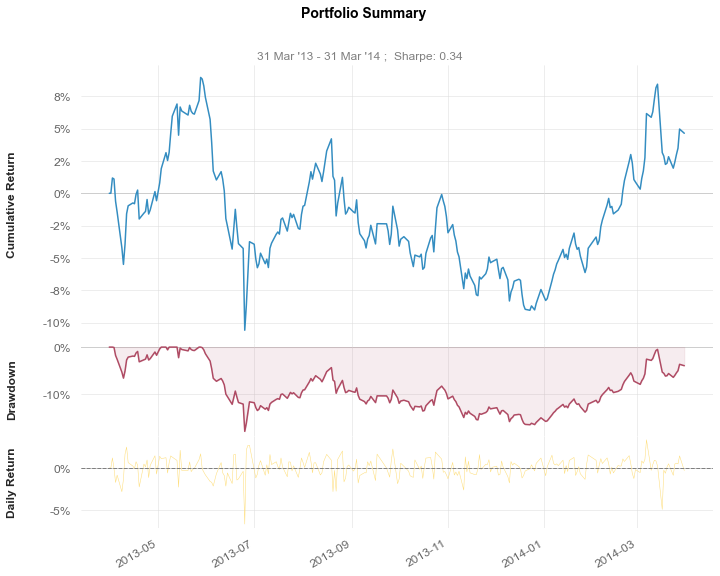

In [57]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략2 : PB&MFI 전략

## 1) 전략2 함수 : 일별수익률로 return

In [58]:
def func_strategy2(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] >= 0.8)&(df_func.loc[i, "MFI10"] >= 80)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if (df_func.loc[i, "PB"] >= 0.8)&(df_func.loc[i, "MFI10"] >= 80):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] <= 0.5): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock

## 2) 포트폴리오 일별 수익률 계산

In [59]:
df_port = df_2012.copy()

### 1. 동등비중

In [60]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy2(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/3801652455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/3801652455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/3801652455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 2. 수익률 높게

In [61]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy2(df_acompany)
#     port_return += df_stock * dict_weight_max[i]
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [62]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy2(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      92.0%

Cumulative Return   15.23%
CAGR﹪              15.28%

Sharpe              2.19
Prob. Sharpe Ratio  98.68%
Sortino             3.73
Sortino/√2          2.63
Omega               1.48

Max Drawdown        -3.3%
Longest DD Days     104

Gain/Pain Ratio     0.48
Gain/Pain (1M)      3.87

Payoff Ratio        1.25
Profit Factor       1.48
Common Sense Ratio  2.16
CPC Index           1.0
Tail Ratio          1.46
Outlier Win Ratio   3.91
Outlier Loss Ratio  3.02

MTD                 1.41%
3M                  6.47%
6M                  6.18%
YTD                 6.47%
1Y                  15.23%
3Y (ann.)           15.28%
5Y (ann.)           15.28%
10Y (ann.)          15.28%
All-time (ann.)     15.28%

Avg. Drawdown       -1.08%
Avg. Drawdown Days  20
Recovery Factor     4.62
Ulcer Index         0.02
Serenity Index      1.47


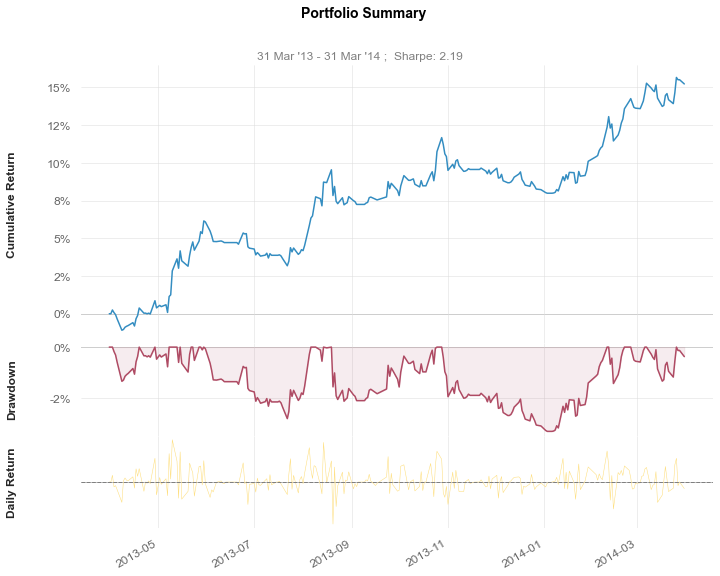

In [63]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

## 함수 만들기(안씀)

In [42]:
df_test = df_PB[df_PB["거래소코드"]=="023430"]
df_test["BS"] = ""
df_test["보유날_종가"] = 0
df_test["보유날_일별수익률"] = 0
df_test["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
df_test

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/1989552553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/1989552553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/1989552553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-02,684,690,650,674,388590,258935068,-1.46,627.80,718.659290,536.940710,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,619.975,595.216667,,0,0,0
2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.008050,536.891950,023430,0.665005,664.000000,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,,0,0,0
2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.289850,537.810150,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,624.775,599.816667,,0,0,0
2012-04-05,650,670,623,640,252864,159818568,-2.14,631.75,722.203536,541.296464,023430,0.545604,644.333333,0,162928704,2.335605,70.020432,-69941.106383,20.817186,660.666667,626.038462,34.628205,674.111111,631.75,626.525,601.816667,,0,0,0
2012-04-06,640,660,620,640,270468,170299356,0.00,635.75,719.684498,551.815502,023430,0.525317,640.000000,0,173099520,1.864958,65.095480,0.000000,29.930879,662.416667,627.500000,34.916667,668.888889,635.75,628.475,603.883333,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,647,650,620,630,16396,10241690,0.32,641.10,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.10,648.550,650.750000,,0,0,0
2013-04-25,630,648,621,631,15182,9597477,0.16,639.40,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.882580,630.833333,644.076923,-13.243590,630.555556,639.40,648.400,650.016667,,0,0,0
2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.989440,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,,0,0,0


In [43]:
from datetime import timedelta 
df_tm2 = pd.DataFrame(df_test.iloc[0]).T
df_tm2["날짜"]=(df_test.index[0] - timedelta(days=2))
df_tm2["BS"] = "sell" 
df_tm2.set_index("날짜", inplace=True)
df_tm2

df_tm1 = pd.DataFrame(df_test.iloc[0]).T
df_tm1["날짜"]=(df_test.index[0] - timedelta(days=1))
df_tm1["BS"] = "sell"
df_tm1.set_index("날짜", inplace=True)
df_tm1

df_test = pd.concat([df_tm2, df_tm1, df_test], axis=0)
df_test.reset_index(drop=False, inplace=True)
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,624.775,599.816667,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,648.55,650.75,,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,648.4,650.016667,,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,647.95,648.583333,,0,0,0


1. BS 컬럼

In [44]:
for i in df_test.index:
    if (i == df_test.index[0])|(i == df_test.index[1]):
        continue
    
    if df_test.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
        if (df_test.loc[i-2, "BS"] == "buy")&(df_test.loc[i-1, "BS"] == "sell")&((df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80)):
            df_test.loc[i-1, "BS"] = "buy"
            df_test.loc[i, "첫매수날_여부"] = 1
        
        if (df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80):
            df_test.loc[i, "BS"] = "buy"
        else:
            df_test.loc[i, "BS"] = "sell"
    
    else: # 전날이 "buy"일 때
        if (df_test.loc[i, "PB"] <= 0.5): # 매도사인
            df_test.loc[i, "BS"] = "sell"
        else:
            df_test.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"


In [45]:
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,sell,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,624.775,599.816667,sell,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,648.55,650.75,sell,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,648.4,650.016667,sell,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,sell,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,647.95,648.583333,sell,0,0,0


2. 보유날 종가 컬럼 생성

In [46]:
for i in df_test.index:
    if df_test.loc[i, "BS"] == "buy":
        df_test.loc[i, "보유날_종가"] = df_test.loc[i, "close"]

In [47]:
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,sell,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,624.775,599.816667,sell,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,648.55,650.75,sell,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,648.4,650.016667,sell,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,sell,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,647.95,648.583333,sell,0,0,0


In [48]:
list(df_test["보유날_종가"])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 743,
 699,
 703,
 670,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 677,
 778,
 764,
 783,
 755,
 815,
 837,
 776,
 823,
 810,
 801,
 796,
 799,
 788,
 778,
 791,
 822,
 813,
 791,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 710,
 721,
 695,
 728,
 703,
 704,
 720,
 704,
 719,
 705,
 714,
 715,
 770,
 801,
 753,
 756,
 739,
 725,
 763,
 740,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 700,
 690,
 700,
 688,
 668,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 734,
 724,
 695,
 709,
 685,
 691,
 698,
 700,
 699,
 700,
 700,
 697,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


3. 보유날 일별 수익률 컬럼 생성

In [49]:
df_test["보유날_일별수익률"] = df_test["보유날_종가"].pct_change()
df_test["보유날_일별수익률"] = df_test["보유날_일별수익률"].fillna(0)
for i in df_test.index:
    if df_test.loc[i, "보유날_일별수익률"] == -1.0:
        df_test.loc[i, "보유날_일별수익률"] = 0
    if df_test.loc[i, "보유날_일별수익률"] == np.inf:
        df_test.loc[i, "보유날_일별수익률"] = 0

In [50]:
list(df_test["보유날_일별수익률"])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05921938088829071,
 0.005722460658083017,
 -0.04694167852062592,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14918759231905465,
 -0.01799485861182515,
 0.024869109947643908,
 -0.03575989782886335,
 0.07947019867549665,
 0.026993865030674913,
 -0.07287933094384702,
 0.06056701030927836,
 -0.015795868772782495,
 -0.011111111111111072,
 -0.006242197253433224,
 0.0037688442211054607,
 -0.013767209011264048,
 -0.012690355329949221,
 0.016709511568123503,
 0.03919089759797734,
 -0.010948905109489093,
 -0.027060270602705994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

4. 첫 매수날 일별 수익률을 0으로

In [167]:
for i in df_test.index:
    if (i == df_test.index[0])|(i == df_test.index[1]):
        continue
    
    if (df_test.loc[i-1, "BS"] == "sell")&(df_test.loc[i, "BS"] == "buy"):
        df_test.loc[i, "첫매수날_여부"] = 1

In [168]:
for i in df_test.index:
    if df_test.loc[i, "첫매수날_여부"] == 1:
        df_test.loc[i, "보유날_일별수익률"] = 0

In [188]:
df_test.drop(index=[0,1],inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_stock = df_test.set_index("날짜")["보유날_일별수익률"]
df_stock

날짜
2012-04-02    0.0
2012-04-03    0.0
2012-04-04    0.0
2012-04-05    0.0
2012-04-06    0.0
             ... 
2013-04-24    0.0
2013-04-25    0.0
2013-04-26    0.0
2013-04-29    0.0
2013-04-30    0.0
Name: 보유날_일별수익률, Length: 269, dtype: float64

plot

In [189]:
import quantstats as qs
qs.reports.metrics(df_stock, mode = 'basic')

                    Strategy
------------------  ----------
Start Period        2012-04-02
End Period          2013-04-30
Risk-Free Rate      0.0%
Time in Market      21.0%

Cumulative Return   -0.49%
CAGR﹪              -0.46%

Sharpe              0.11
Prob. Sharpe Ratio  54.71%
Sortino             0.19
Sortino/√2          0.14
Omega               1.04

Max Drawdown        -17.72%
Longest DD Days     216

Gain/Pain Ratio     0.04
Gain/Pain (1M)      0.15

Payoff Ratio        1.13
Profit Factor       1.04
Common Sense Ratio  0.8
CPC Index           0.57
Tail Ratio          0.77
Outlier Win Ratio   20.85
Outlier Loss Ratio  1.96

MTD                 0.0%
3M                  0.0%
6M                  -9.38%
YTD                 -5.04%
1Y                  -0.49%
3Y (ann.)           -0.46%
5Y (ann.)           -0.46%
10Y (ann.)          -0.46%
All-time (ann.)     -0.46%

Avg. Drawdown       -8.08%
Avg. Drawdown Days  69
Recovery Factor     -0.03
Ulcer Index         0.11
Serenity Index      -0.

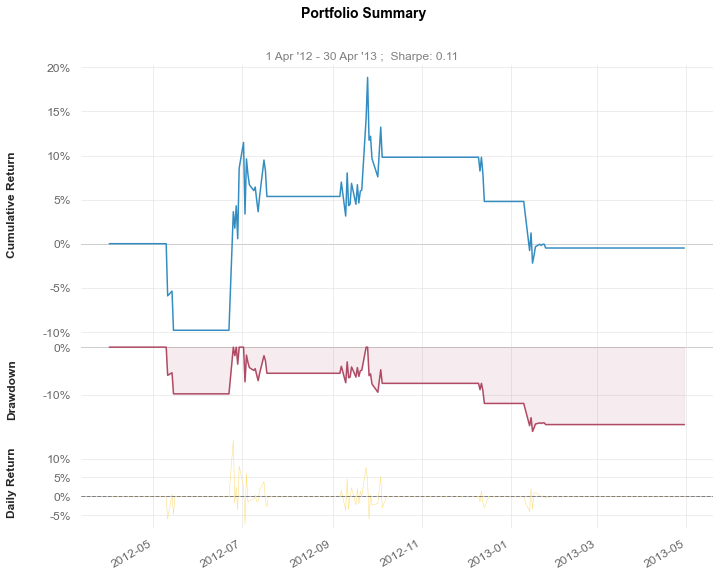

In [190]:
qs.plots.snapshot(df_stock)

---
# 전략3

## 1) 전략3 함수 : 일별수익률로 return

In [64]:
def func_strategy3(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] <= 0.05)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "PB"] <= 0.05)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] >= 0.95)&(df_func.loc[i, "IIP21"] <= 0): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [65]:
df_port = df_2012.copy()

### 1. 동등비중

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy3(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [67]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy3(df_acompany)
#     port_return += df_stock * dict_weight_max[i]
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [68]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy3(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   4.58%
CAGR﹪              4.59%

Sharpe              0.53
Prob. Sharpe Ratio  69.87%
Sortino             0.79
Sortino/√2          0.56
Omega               1.1

Max Drawdown        -10.48%
Longest DD Days     223

Gain/Pain Ratio     0.1
Gain/Pain (1M)      0.51

Payoff Ratio        1.17
Profit Factor       1.1
Common Sense Ratio  1.51
CPC Index           0.62
Tail Ratio          1.38
Outlier Win Ratio   3.68
Outlier Loss Ratio  3.46

MTD                 3.24%
3M                  6.3%
6M                  2.06%
YTD                 6.3%
1Y                  4.58%
3Y (ann.)           4.59%
5Y (ann.)           4.59%
10Y (ann.)          4.59%
All-time (ann.)     4.59%

Avg. Drawdown       -2.1%
Avg. Drawdown Days  42
Recovery Factor     0.44
Ulcer Index         0.06
Serenity Index      0.05


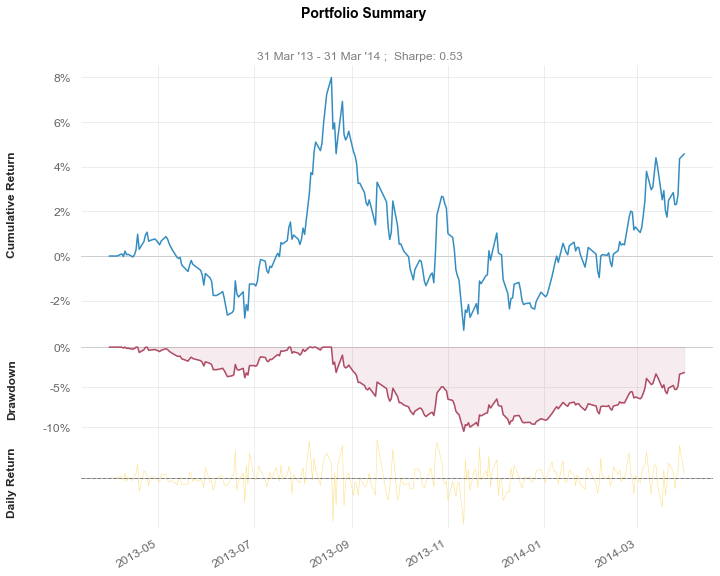

In [69]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략4

## 1) 전략4 함수 : 일별수익률로 return

In [70]:
def func_strategy4(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if ((df_func.loc[i, "MACD"] <= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] <= df_func.loc[i, "MA20"])): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [71]:
df_port = df_2012.copy()

### 1. 동등비중

In [72]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy4(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

### 2. 수익률 높게

In [73]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy4(df_acompany)
#     port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [74]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy4(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      96.0%

Cumulative Return   6.41%
CAGR﹪              6.43%

Sharpe              0.82
Prob. Sharpe Ratio  78.94%
Sortino             1.17
Sortino/√2          0.83
Omega               1.16

Max Drawdown        -6.76%
Longest DD Days     206

Gain/Pain Ratio     0.16
Gain/Pain (1M)      1.09

Payoff Ratio        1.03
Profit Factor       1.16
Common Sense Ratio  1.11
CPC Index           0.63
Tail Ratio          0.96
Outlier Win Ratio   3.71
Outlier Loss Ratio  3.47

MTD                 0.15%
3M                  5.07%
6M                  0.88%
YTD                 5.07%
1Y                  6.41%
3Y (ann.)           6.43%
5Y (ann.)           6.43%
10Y (ann.)          6.43%
All-time (ann.)     6.43%

Avg. Drawdown       -1.91%
Avg. Drawdown Days  31
Recovery Factor     0.95
Ulcer Index         0.03
Serenity Index      0.15


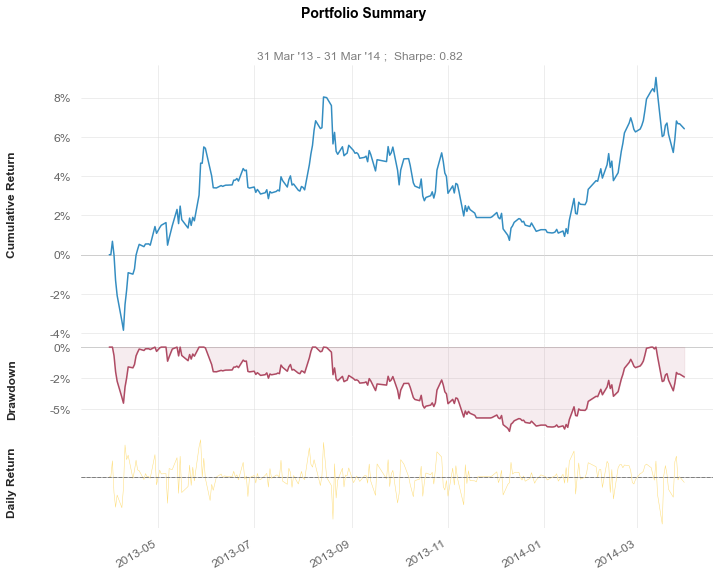

In [75]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략5

## 1) 전략5 함수 : 일별수익률로 return

In [79]:
def func_strategy5(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])): # 매수사인(위 if문에도 넣기)
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "close"] <= df_func.loc[i, "MA40"]): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [80]:
df_port = df_2012.copy()

### 1. 동등비중

In [81]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy5(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 2. 수익률 높게

In [82]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy5(df_acompany)
#     port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [83]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy5(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   22.22%
CAGR﹪              22.28%

Sharpe              2.26
Prob. Sharpe Ratio  98.42%
Sortino             3.46
Sortino/√2          2.45
Omega               1.49

Max Drawdown        -5.4%
Longest DD Days     174

Gain/Pain Ratio     0.49
Gain/Pain (1M)      2.51

Payoff Ratio        1.28
Profit Factor       1.49
Common Sense Ratio  1.76
CPC Index           1.03
Tail Ratio          1.18
Outlier Win Ratio   3.24
Outlier Loss Ratio  3.98

MTD                 5.08%
3M                  13.97%
6M                  11.92%
YTD                 13.97%
1Y                  22.22%
3Y (ann.)           22.28%
5Y (ann.)           22.28%
10Y (ann.)          22.28%
All-time (ann.)     22.28%

Avg. Drawdown       -1.33%
Avg. Drawdown Days  19
Recovery Factor     4.12
Ulcer Index         0.03
Serenity Index      0.7

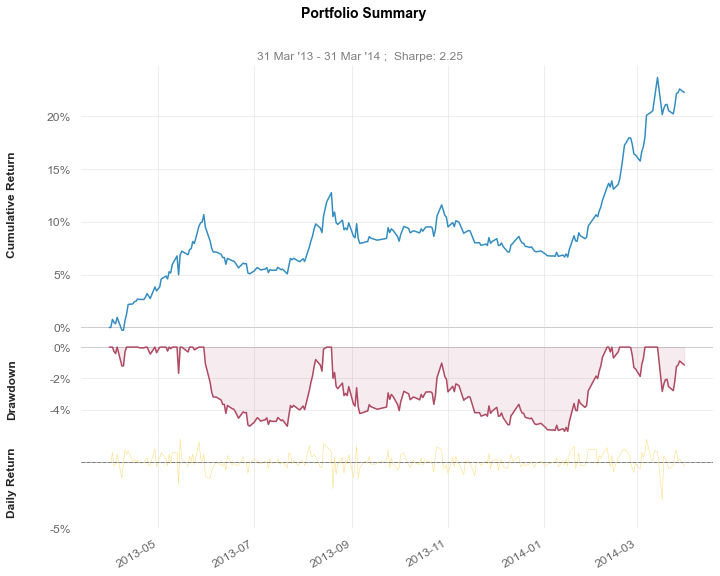

In [84]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)